In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
import time

In [2]:
#create a matrix of size 2L*2L (in order to take into account PBC, we take an outer shell)
def create(L) :
    return [[x_0,x_1] for x_0 in range(2*L) for x_1 in range(2*L)]

In [3]:
#takes a point x_0, a matrix and returns and array that contains the distances of all points of the matrix from the point x_0
#i.e. arr_dist = [distance(x_0,x_1),distance(x_0,x_2) ...]
def distance(x_0,matrix):
    x = [sites[0] for sites in matrix]
    y = [sites[1] for sites in matrix]
    delta_x = [abs(x_0[0]-i) for i in x]
    delta_y = [abs(x_0[1]-j) for j in y]
    arr_dist = [(delta_x[i]**2 + delta_y[i]**2)**(1/2) for i in range(len(delta_x))]
    delta_x.sort()
    #print(delta_x)
    return arr_dist

In [4]:
# an array of all possible radii is created
# {r} s.t. r taken from the interval [0.01,L/2] with steps of 200
def radii(L, steps):
    radius = np.linspace(0.1,L/2,num=steps)
    return radius

In [5]:
# choose a center randomly in the original matrix
def x_0(L):                                                                              
    x = random.uniform(round(L/2),round(3*L/2-1))
    y = random.uniform(round(L/2),round(3*L/2-1))
    center = [x,y]
    return center

In [6]:
def count(x_0,mat,radius): #count how many points are at a distance <= r from x
    L = len(mat)
    dist = distance(x_0,mat)
    dist.sort()
    d = np.array(dist)
    counts = []
    for R in radius:
        count_R = np.count_nonzero(d <= R)
        counts.append(count_R)
    #print(counts)
    return counts

def vec_x0(L,n):
    v = [x_0(L) for i in range(n)]
    return v

def arr_counts(L,n,radius,mat):
    v = vec_x0(L,n)
    arr = [count(x0,mat,radius) for x0 in v]
    return arr

In [7]:
def variance(L,n,radius,mat):
    arr = arr_counts(L,n,radius,mat)
    m = np.array(arr)
    arr_var = []
    for i in range(len(radius)):
        mom = np.power(m[:,i],2)
        var = (np.average(mom)-np.power(np.average(m[:,i]),2))/radius[i]**2
        arr_var.append(var)
    return arr_var

In [10]:
start = time.time()
size = [50,100,200]
arrays_var = []
radius = []
for i in range(len(size)):
    a = create(size[i])
    radius.append(radii(size[i],200))
    arrays_var.append(variance(size[i],10000,radius[i],a))
total = time.time()-start
print(total)

2256.476875782013


In [ ]:
arrays_var

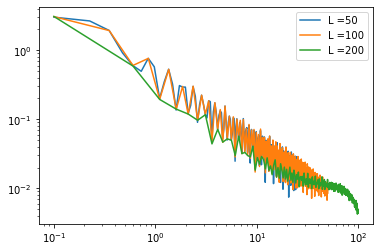

In [11]:
for i in range(len(size)):
    plt.plot(radius[i], arrays_var[i], label = 'L =' + str(size[i]))
    plt.xscale('log')
    plt.yscale('log')
plt.legend()
plt.show()